In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
row_data = pd.read_csv(r"C:\Users\Kevin's PC\Desktop\The Data Science Course 2020 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S38_L268\iris-dataset.csv")
row_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data = row_data[['petal_length','petal_width']]
data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'width')

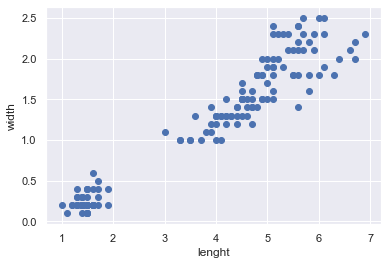

In [4]:
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('lenght')
plt.ylabel('width')

In [5]:
x = data.copy()

In [12]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

In [14]:
clusters

,petal_length,petal_width,cluster_pred
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


Text(0, 0.5, 'width')

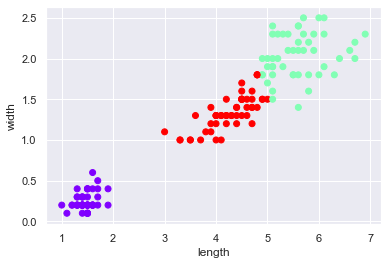

In [15]:
plt.scatter(clusters['petal_length'],clusters['petal_width'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('length')
plt.ylabel('width')

In [11]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

In [16]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[300.0,
 54.145847013449895,
 18.046983891906272,
 12.307440251261845,
 9.181131495513899,
 7.210310805349153,
 6.0265931559514465,
 5.151546796494884,
 4.426589153575175]

Text(0, 0.5, 'wcss')

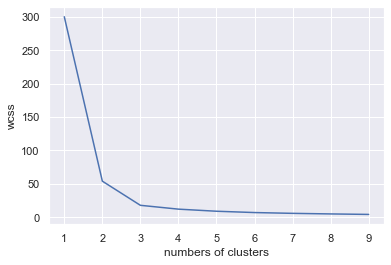

In [17]:
plt.plot(range(1,10),wcss)
plt.xlabel('numbers of clusters')
plt.ylabel('wcss')

In [18]:
kmeans_new =KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [19]:
clusters_new

,petal_length,petal_width,cluster_pred
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


Text(0, 0.5, 'width')

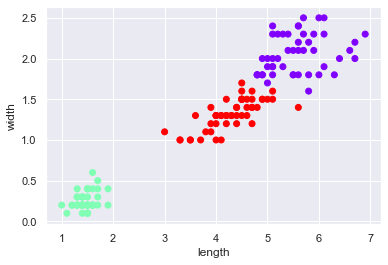

In [20]:
plt.scatter(clusters_new['petal_length'],clusters_new['petal_width'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('length')
plt.ylabel('width')